# 📌 Objective

### This notebook trains a Linear Regression model to predict house prices based on property area and evaluates its performance using standard regression metrics.

### Import libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load dataset

In [3]:
df = pd.read_csv("House Price India.csv")
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


### Define features and target

In [4]:
X = df[["Area of the house(excluding basement)"]]
y = df["Price"]

### Train-Test split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Train Linear Regression Model

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Model Parameters Interpretation

In [7]:
model.coef_, model.intercept_

(array([264.12034678]), 62697.92585854011)

## Business Interpretation
- Coefficient represents price increase per unit area
- Intercept is the baseline price when area is zero

### Predictions

In [9]:
y_pred = model.predict(X_test)

### Model evaluation

In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(187694.71741530008, 298131.0125531107, 0.39441166157154683)

### Actual vs Predicted Visualization

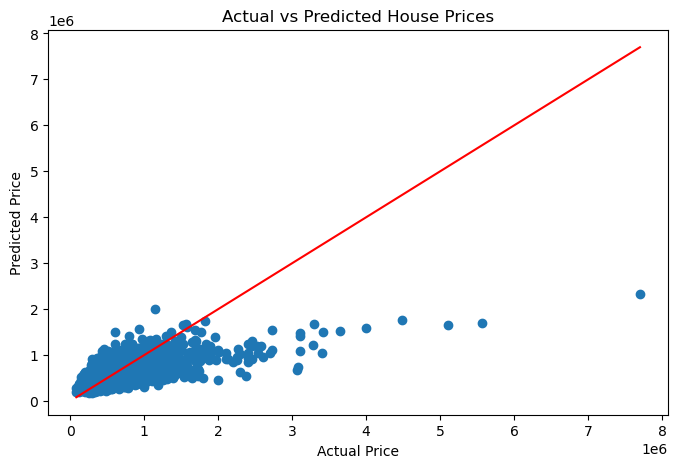

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")
plt.show()

### Predict Price for New Input

In [12]:
new_area = [[1500]]
predicted_price = model.predict(new_area)

predicted_price

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([458878.44602307])

### Model training summary
- Linear Regression trained on property area
- Model shows positive relationship between area and price
- Evaluation metrics indicate reasonable prediction accuracy
- Suitable baseline model for real estate pricing